In [131]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [132]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.


Conexión y carga de datos desde MySQL

In [186]:
import mysql.connector

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator

In [148]:
try:
    conexion = mysql.connector.connect(
        host='localhost',
        user='root',
        password='D4705.mySQL',
        database='sprint4')

    cursor = conexion.cursor()
    print("✅ Conexión exitosa a la base de datos.")

    # Función para cargar tablas
    def cargar_tabla(nombre_tabla):
        cursor.execute(f"SELECT * FROM {nombre_tabla}")
        return pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

    # Cargar tablas
    df_company = cargar_tabla("company")
    df_user = cargar_tabla("user")
    df_credit_card = cargar_tabla("credit_card")
    df_card_status = cargar_tabla("card_status")
    df_product = cargar_tabla("product")
    df_transaction = cargar_tabla("transaction")
    df_transaction_product = cargar_tabla("transaction_product")

    cursor.close()
    conexion.close()

except mysql.connector.Error as err:
    print(f"❌ Error de conexión a la base de datos: {err}")


cursor.close()
conexion.close()

✅ Conexión exitosa a la base de datos.


Limpieza y transformación

In [149]:
cols_a_string = ["comp_id", "comp_name", "comp_country","comp_phone", "comp_email", "comp_website"]
df_company[cols_a_string] = df_company[cols_a_string].astype("string")

df_company.dtypes

comp_id         string[python]
comp_name       string[python]
comp_country    string[python]
comp_phone      string[python]
comp_email      string[python]
comp_website    string[python]
dtype: object

In [150]:
df_user["user_birth_date"] = pd.to_datetime(df_user["user_birth_date"], errors="coerce")

cols_a_string = ["user_name", "user_surname", "user_phone", "user_email","user_country", "user_city", "user_postal_code", "user_address"]
df_user[cols_a_string] = df_user[cols_a_string].astype("string")

df_user.dtypes

user_id                      int64
user_name           string[python]
user_surname        string[python]
user_phone          string[python]
user_email          string[python]
user_birth_date     datetime64[ns]
user_country        string[python]
user_city           string[python]
user_postal_code    string[python]
user_address        string[python]
dtype: object

In [151]:
df_credit_card["card_expiring_date"] = pd.to_datetime(df_credit_card["card_expiring_date"], errors="coerce")

cols_a_string = ["card_id", "card_iban", "card_pan","card_pin", "card_cvv", "card_track1", "card_track2"]
df_credit_card[cols_a_string] = df_credit_card[cols_a_string].astype("string")

df_credit_card.dtypes

card_id               string[python]
card_iban             string[python]
card_pan              string[python]
card_pin              string[python]
card_cvv              string[python]
card_track1           string[python]
card_track2           string[python]
card_expiring_date    datetime64[ns]
dtype: object

In [152]:
df_card_status["status"] = df_card_status["status"].astype("boolean")
df_card_status["card_id"] = df_card_status["card_id"].astype("string")

df_card_status.dtypes

card_id    string[python]
status            boolean
dtype: object

In [153]:
cols_a_string = ["prod_name", "prod_colour", "prod_warehouse_id"]
df_product[cols_a_string] = df_product[cols_a_string].astype("string")

df_product["prod_price"] = pd.to_numeric(df_product["prod_price"], errors="coerce").round(2)
df_product["prod_weight"] = pd.to_numeric(df_product["prod_weight"], errors="coerce").round(2)

df_product.dtypes

prod_id                       int64
prod_name            string[python]
prod_price                  float64
prod_colour          string[python]
prod_weight                 float64
prod_warehouse_id    string[python]
dtype: object

In [154]:
cols_id = ["tran_id", "card_id", "comp_id"]
df_transaction[cols_id] = df_transaction[cols_id].astype("string")

df_transaction["tran_timestamp"] = pd.to_datetime(df_transaction["tran_timestamp"], errors="coerce")
df_transaction["tran_amount"] = pd.to_numeric(df_transaction["tran_amount"], errors="coerce").round(2)
df_transaction["tran_decline"] = df_transaction["tran_decline"].astype("boolean")

df_transaction.dtypes

tran_id           string[python]
card_id           string[python]
comp_id           string[python]
user_id                    int64
tran_timestamp    datetime64[ns]
tran_amount              float64
tran_decline             boolean
tran_lat                 float64
tran_longitude           float64
dtype: object

In [155]:
df_transaction_product["tran_id"] = df_transaction_product["tran_id"].astype("string")

df_transaction_product.dtypes

tran_id    string[python]
prod_id             int64
dtype: object

Estilo general

In [259]:
#Paleta de colores
color_columna = "#1b435f"
color_columna_contraste = "#a8c3d5"
color_borde = "#0f2a3b"
color_fondo_grafico = "#f5f5f5"
color_fondo_general = "#dce9f5"

def aplicar_estilo(
    ax,
    fig=None,
    titulo="",
    xlabel="",
    ylabel="",
    xtick_labels=None,
    xtick_rotation=0,
    grid_x=False,
    grid_y=False,
    intervalo_x=None,
    intervalo_y=None,
    mostrar_leyenda=False,
    leyenda_title=None,
   ):
    if fig:
        fig.patch.set_facecolor(color_fondo_general)
    ax.set_facecolor(color_fondo_grafico)
    
    # Títulos y etiquetas
    ax.set_title(titulo, color=color_borde)
    ax.set_xlabel(xlabel, color=color_borde)
    ax.set_ylabel(ylabel, color=color_borde)

    # Bordes y ticks
    ax.spines['bottom'].set_color(color_borde)
    ax.spines['left'].set_color(color_borde)
    ax.tick_params(axis='x', colors=color_borde)
    ax.tick_params(axis='y', colors=color_borde)

    # Etiquetas eje X personalizadas
    if xtick_labels is not None:
        ax.set_xticks(range(len(xtick_labels)))
        ax.set_xticklabels(xtick_labels, rotation=xtick_rotation, ha='right', color=color_borde)

    # Cuadrículas
    if grid_x:
        ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color=color_borde, alpha=0.5)
    if grid_y:
        ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color=color_borde, alpha=0.5)

    # Intervalos
    if intervalo_x:
        ax.xaxis.set_major_locator(MultipleLocator(intervalo_x))
    if intervalo_y:
        ax.yaxis.set_major_locator(MultipleLocator(intervalo_y))

    # Leyenda
    if mostrar_leyenda and ax.get_legend():
        ax.legend(title=leyenda_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    elif ax.get_legend():
        ax.get_legend().remove()
    
    # Ajuste automático
    if fig:
        plt.tight_layout()



- Ejercicio 1
Una variable numérica.

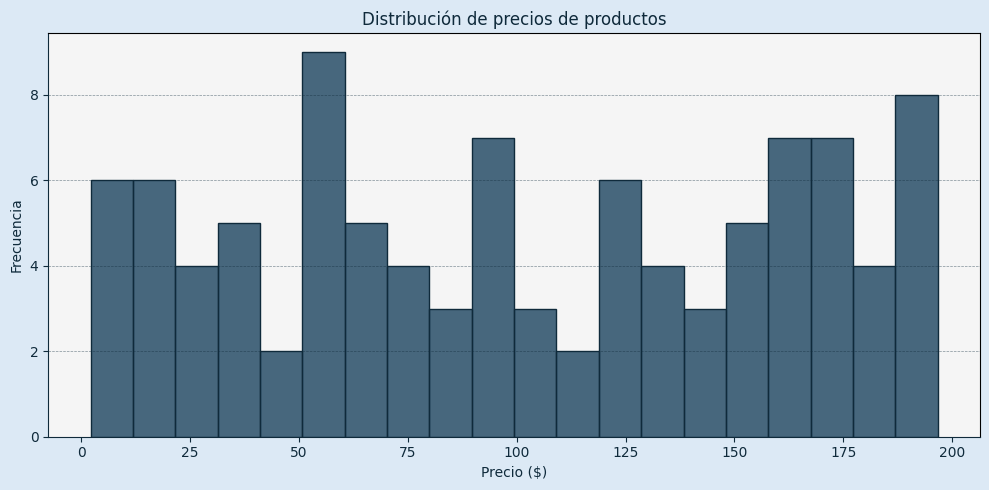

In [251]:
# Figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico: Histograma
sns.histplot(
    df_product["prod_price"],
    bins=20,
    color=color_columna,
    edgecolor=color_borde,
    alpha=0.8,
    ax=ax
)

# Estilo
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Distribución de precios de productos",
    xlabel="Precio ($)",
    ylabel="Frecuencia",
    grid_y=True
)

plt.show()


- Ejercicio 2
Dos variables numéricas.

In [252]:
# Dataframe: Transacciones aprobadas
df_tran_ok = df_transaction[df_transaction["tran_decline"] == False]

#Dataframe: Transacciones aprobadas + Amount + Producto + Precio
df_tran_ok_prod = df_transaction_product.merge(df_tran_ok[["tran_id", "tran_amount"]], on="tran_id")
df_tran_ok_prod = df_tran_ok_prod.merge(df_product[["prod_id", "prod_price"]], on="prod_id")
df_tran_ok_prod

,tran_id,prod_id,tran_amount,prod_price
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1,466.92,161.11
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1,172.01,161.11
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1,497.84,161.11
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1,200.04,161.11
4,1EA2B262-D507-AD14-4374-4D532967113F,1,274.15,161.11
...,...,...,...,...
1231,E1DEA6A2-4E2A-C572-3E58-CBCBEAED2A99,97,105.42,65.25
1232,E6E14C3A-1AE7-7B62-57D8-16A6F19C995F,97,26.22,65.25
1233,EAD89828-65AA-E817-F946-E7365972D94E,97,26.96,65.25
1234,F5ACD74B-4275-5AA1-2414-6EF417636B98,97,148.97,65.25


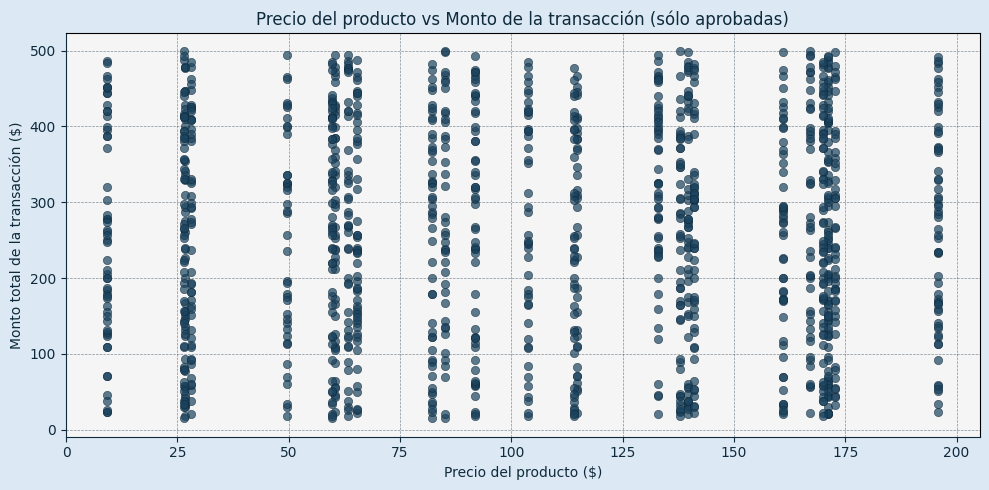

In [253]:
# Figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico: Scatterplot
sns.scatterplot(
    data=df_tran_ok_prod,
    x="prod_price",
    y="tran_amount",
    color=color_columna,
    edgecolor=color_borde,
    alpha=0.7,
    ax=ax
)

# Estilo
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Precio del producto vs Monto de la transacción (sólo aprobadas)",
    xlabel="Precio del producto ($)",
    ylabel="Monto total de la transacción ($)",
    grid_x=True,
    grid_y=True
)

plt.show()



- Ejercicio 3
Una variable categórica.


In [226]:
# Dataframe: Cantidad de compañias por pais
df_comp_x_pais = df_company['comp_country'].value_counts().reset_index()
df_comp_x_pais.columns = ['country', 'companies']
df_comp_x_pais

,country,companies
0,Sweden,11
1,Netherlands,10
2,United States,9
3,United Kingdom,9
4,Italy,9
5,Germany,8
6,Belgium,8
7,Norway,7
8,Australia,6
9,New Zealand,6


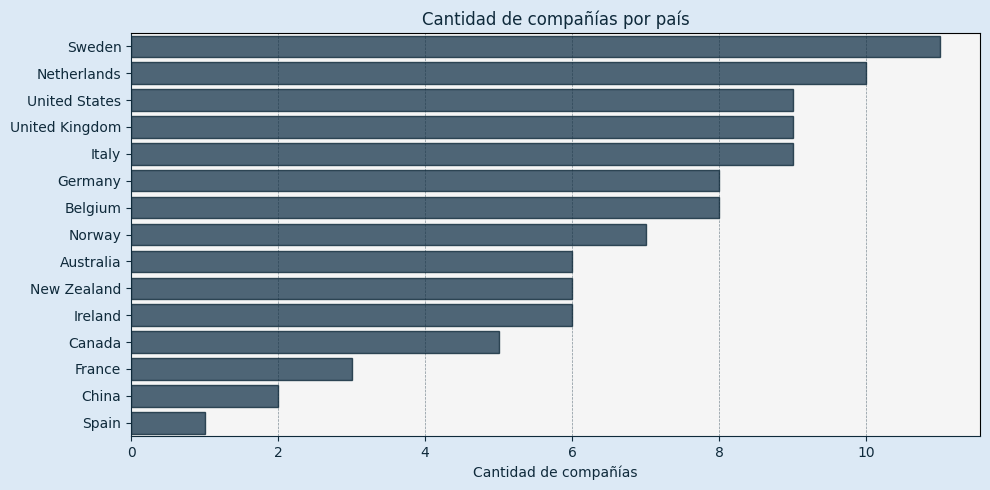

In [254]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico: Barplot horizontal (barras horizontales)
sns.barplot(
    data=df_comp_x_pais,
    y='country',
    x='companies',
    color=color_columna,
    edgecolor=color_borde,
    alpha=0.8,
    ax=ax
)

# Estilo
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Cantidad de compañías por país",
    xlabel="Cantidad de compañías",
    ylabel="",
    grid_x=True
)

plt.show()


- Ejercicio 4
Una variable categórica y una numérica.

In [163]:
#Dataframe: Transacciones aceptadas la compañia
df_tran_ok_pais = df_tran_ok.merge(df_company[['comp_id', 'comp_country']], on='comp_id')

#Dataframe: Amount total en transacciones por pais
df_monto_x_pais = df_tran_ok_pais.groupby('comp_country')['tran_amount'].sum().reset_index()
df_monto_x_pais

,comp_country,tran_amount
0,Australia,1063.99
1,Belgium,2041.74
2,Canada,14930.69
3,China,444.48
4,France,508.23
5,Germany,26888.55
6,Ireland,16006.22
7,Italy,2190.08
8,Netherlands,2409.40
9,New Zealand,1002.37


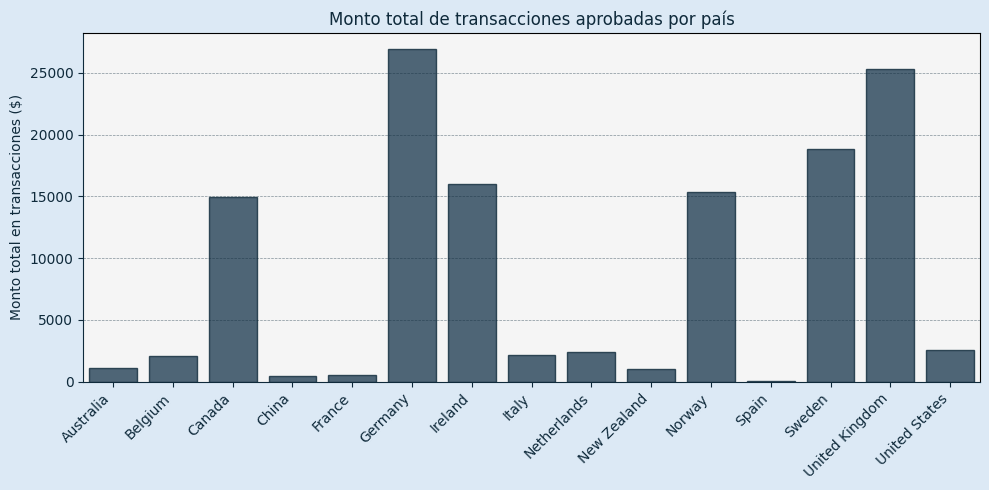

In [255]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar
sns.barplot(
    data=df_monto_x_pais, 
    x='comp_country', y='tran_amount', 
    color=color_columna, 
    edgecolor=color_borde, 
    alpha=0.8,
    ax=ax
)

# Estilo 
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Monto total de transacciones aprobadas por país",
    xlabel="",
    ylabel="Monto total en transacciones ($)",
    xtick_labels=ax.get_xticklabels(),
    xtick_rotation=45,
    grid_y=True
)

plt.show()


- Ejercicio 5
Dos variables categóricas.


In [244]:
# Dataframe
df_tran_pais = df_transaction.merge(df_company[["comp_id", "comp_country"]], on="comp_id")

df_tran_x_pais = df_tran_pais.groupby(["comp_country", "tran_decline"]).size().unstack(fill_value=0)
df_tran_x_pais_pct = df_tran_x_pais.div(df_tran_x_pais.sum(axis=1), axis=0) * 100
df_tran_x_pais_pct.columns = ["Aprobada", "Rechazada"]
df_tran_x_pais_pct 


,Aprobada,Rechazada
comp_country,,
Australia,50.000000,50.000000
Belgium,61.538462,38.461538
Canada,93.442623,6.557377
China,66.666667,33.333333
France,50.000000,50.000000
Germany,94.067797,5.932203
Ireland,90.322581,9.677419
Italy,52.941176,47.058824
Netherlands,55.555556,44.444444


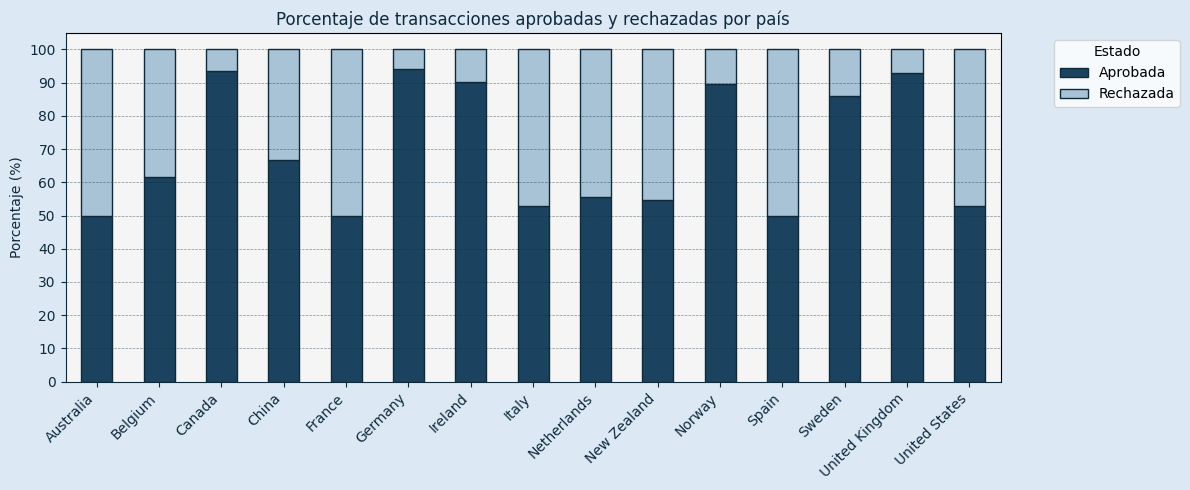

In [260]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 5))

# Graficar
df_tran_x_pais_pct.plot(
    kind='bar',
    stacked=True,
    color=[color_columna, color_columna_contraste],
    edgecolor=color_borde,
    ax=ax
)

# Estilo 
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Porcentaje de transacciones aprobadas y rechazadas por país",
    xlabel="",
    ylabel="Porcentaje (%)",
    xtick_labels=df_tran_x_pais_pct.index,
    xtick_rotation=45,
    grid_y=True,
    intervalo_y=10,
    mostrar_leyenda=True,
    leyenda_title="Estado",
)

plt.show()


- Ejercicio 6
Tres variables.

In [181]:
# 3. Agrupar por país: calcular cantidad de transacciones y monto promedio
df_stats_pais = df_tran_ok_pais.groupby('comp_country').agg({
    'tran_id': 'count',
    'tran_amount': 'mean'
}).reset_index()

# 4. Renombrar columnas
df_stats_pais.columns = ['pais', 'cantidad_transacciones', 'monto_promedio']

df_stats_pais

,pais,cantidad_transacciones,monto_promedio
0,Australia,6,177.331667
1,Belgium,8,255.217500
2,Canada,57,261.941930
3,China,2,222.240000
4,France,3,169.410000
5,Germany,111,242.239189
6,Ireland,56,285.825357
7,Italy,9,243.342222
8,Netherlands,10,240.940000
9,New Zealand,6,167.061667


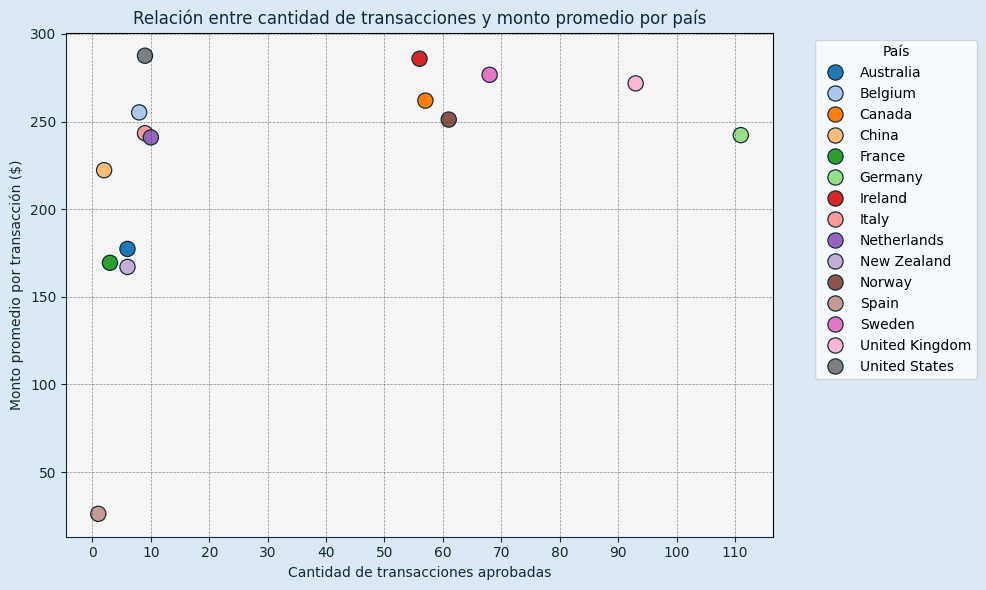

In [ ]:
# Crear paleta para 15 países con 'tab20'
colores_por_pais = dict(zip(
    df_stats_pais['pais'],
    sns.color_palette("tab20", 15)
))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de dispersión
sns.scatterplot(
    data=df_stats_pais,
    x='cantidad_transacciones',
    y='monto_promedio',
    hue='pais',
    palette=colores_por_pais,
    s=120,
    edgecolor=color_borde,
    ax=ax
)

aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Relación entre cantidad de transacciones y monto promedio por país",
    xlabel="Cantidad de transacciones aprobadas",
    ylabel="Monto promedio por transacción ($)",
    grid_x=True,
    grid_y=True,
    intervalo_x=10,
    mostrar_leyenda=True,
    leyenda_title="País",
)

plt.show()

- Ejercicio 7
Graficar un Pairplot.


Nivel 2
Ejercicio 1
Correlación de todas las variables numéricas.


Ejercicio 2
Implementa un jointplot.


Nivel 3
Ejercicio 1
Implementa un violinplot combinado con otro tipo de gráfico.

Ejercicio 2
Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.